## **Importe das bibliotecas**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Seleção de atributos

A correlação pode ser utilizada para seleção de atributos no intuito de diminuir a dimensionalidade do dataset.

In [2]:
%store -r data

categorical_features = data.select_dtypes(include = ["object"]).columns 
numerical_features = data.select_dtypes(exclude = ["object"]).columns 
print("Quantidade de atributos : " + str(data.shape))
print("Atributos numéricos : " + str(len(numerical_features)))
print("Atributos categóricos : " + str(len(categorical_features)))
data_num = data[numerical_features]
data_cat = data[categorical_features]

Quantidade de atributos : (1460, 81)
Atributos numéricos : 38
Atributos categóricos : 43


### Para os atributos numéricos
- A matriz de correlação pode ser usada para seleção de atributos.
- Em seguida, para estudar o padrão da relação entre os recursos e a variável alvo e entre si, vamos correlacionar usando parplot (seaborn)

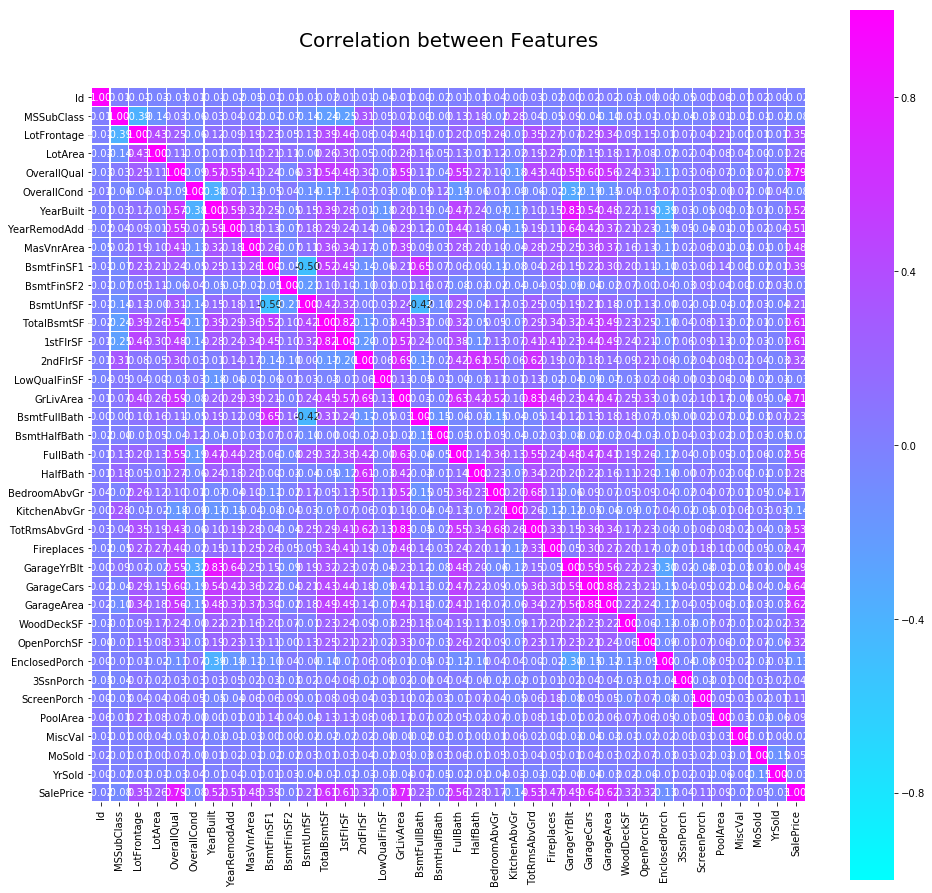

In [3]:
colormap = plt.cm.cool
plt.figure(figsize=(16,16))
plt.title('Correlation between Features', y=1.05, size = 20)
sns.heatmap(data_num.corr(),
            linewidths=0.1, 
            center = 0,
            vmin = -1,
            vmax= 1, 
            annot=True,
            square=True, 
            fmt='.2f', 
            annot_kws={'size': 10},
            cmap=colormap, 
            linecolor='white');

- Do heatmap, os seguintes atributos têm correlação insignificante com o atributo SalePrice

#####  - Dessa forma, é possível remover os atributos que tem baixa correlação com SalePrice (entre -0.14 e 0.28) 

In [4]:
low_corr_coeff = [ 'Id' , 'MSSubClass' , 'OverallCond' , 'BsmtFinSF2' ,
'LowQualFinSF' , 'BsmtHalfBath' , 'BedroomAbvGr' , 'KitchenAbvGr' ,
'EnclosedPorch' , '3SsnPorch' , 'ScreenPorch' , 'PoolArea' , 'MiscVal' ,
                  'MoSold' , 'YrSold' , 'BsmtUnfSF' , 'LotArea' , 
                  'HalfBath' , 'BsmtFullBath']
data_num = data_num.drop(data_num[low_corr_coeff], axis = 1)
data_num.shape

(1460, 19)

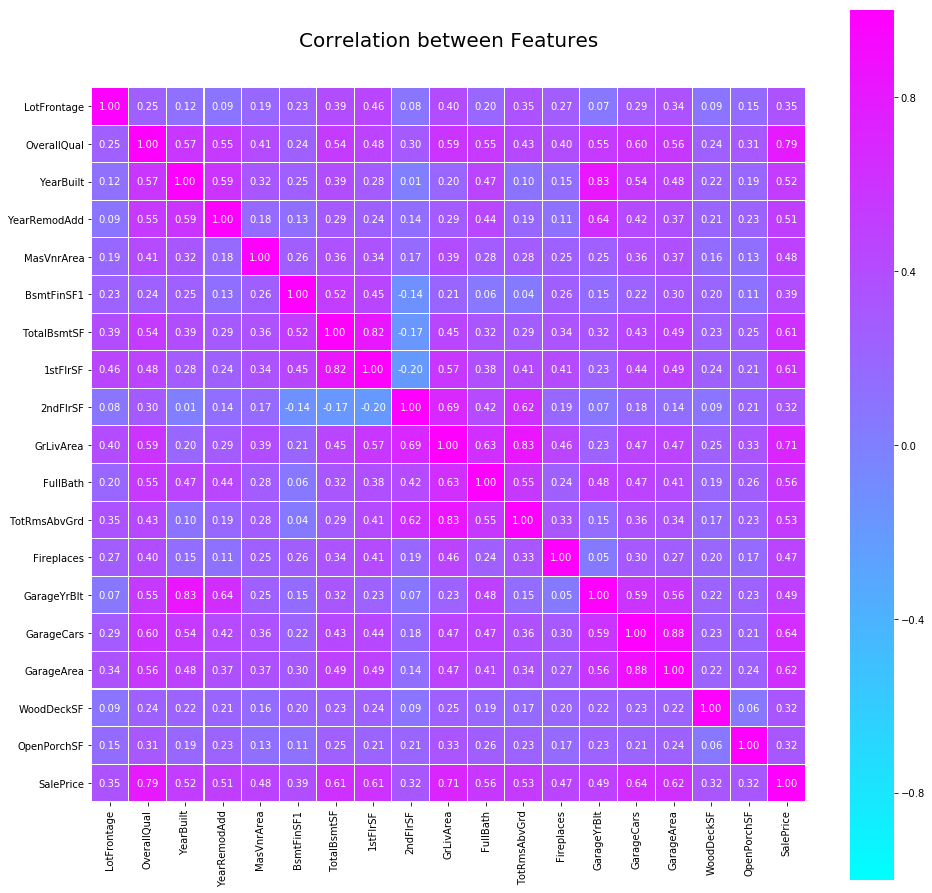

In [5]:
colormap = plt.cm.cool
plt.figure(figsize=(16,16))
plt.title('Correlation between Features', y=1.05, size = 20)
sns.heatmap(data_num.corr(),
            linewidths=0.1, 
            center = 0,
            vmin = -1,
            vmax= 1, 
            annot=True,
            square=True, 
            fmt='.2f', 
            annot_kws={'size': 10},
            cmap=colormap, 
            linecolor='white');

### Segunda forma de detectar os atributos a serem removidos e os mais importantes usando coeficiente de correlação

In [6]:
print("Find most important features relative to target")
data_num_aux = data[numerical_features]
corr = data_num_aux.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

### E para os atributos categóricos?

- não faz sentido a análise do coeficiente de correlação para os atributos categóricos
- para a seleção de atributos, podemos eliminar os atributos que tem em torno de 50% de valores nulos para reduzir a dimensionalidade

In [7]:
data_cat.head

<bound method DataFrame.head of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl

In [8]:
null_columns = [ 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
data_cat = data_cat.drop(data_cat[null_columns], axis = 1)
data_cat.shape

(1460, 38)

# Detecção de Outliers - Dados de Treino

- Inicialmente, nos atributos que tem maior correlação com SalePrice

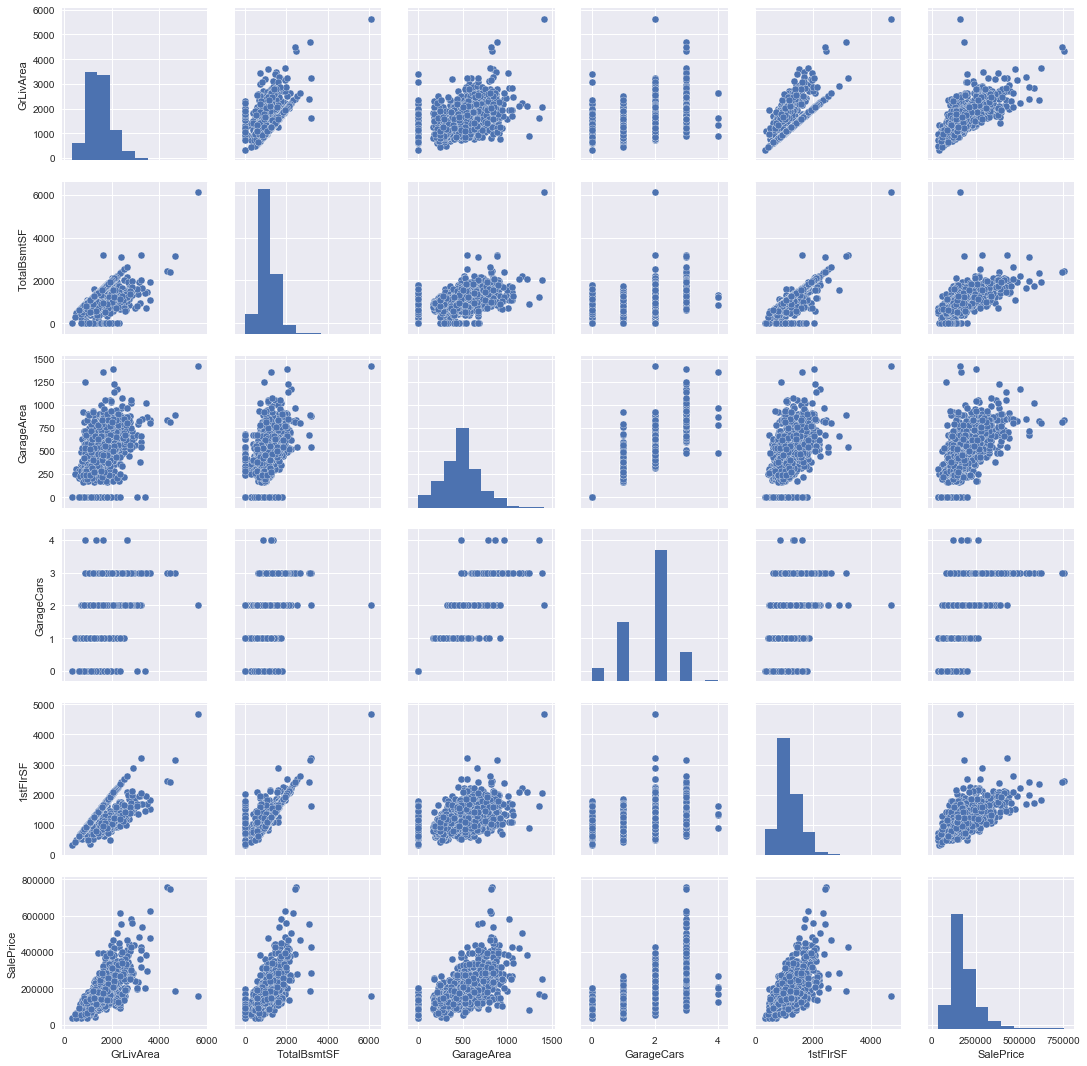

In [9]:
sns.set()
cols = [ 'GrLivArea' , 'TotalBsmtSF', 'GarageArea', 'GarageCars', '1stFlrSF', 'SalePrice']
new = data_num[cols]
sns.pairplot(new, size = 2.5)
plt.show();

- Podemos usar os plots descritos para descobrir os outliers.
- Perceba que:
    - GrLivArea > 4500
    - TotalBsmtSF > 6000
    - GarageArea > 1250
    - 1stFlrSF > 4000
- Para remoçao de ouliers, é necessário unir atributos categóricos e numéricos

In [10]:
numerical_categaorical = [data_num, data_cat]
train = pd.concat(numerical_categaorical, axis = 1)
print(train.shape)

train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index, inplace = True)
train.drop(train[(train['TotalBsmtSF']  >= 6000)].index, inplace = True)
train.drop(train[(train['GarageArea'] > 1250)].index, inplace = True)
train.drop(train[(train['1stFlrSF'] > 4000)].index, inplace = True)

train_num = train[data_num.columns]
train_cat = train[data_cat.columns] 

(1460, 57)


In [11]:
print(train.shape, train_num.shape, train_cat.shape)

((1456, 57), (1456, 19), (1456, 38))


### Armazenar a variavel train que será usada no próximo notebook

In [12]:
%store train

Stored 'train' (DataFrame)


### Break: Agora escolham outros atributos para detecção de possíveis outliers em seus valores